In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import nltk.classify.util 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn import metrics 
from sklearn.metrics import roc_curve, auc 
from nltk.classify import NaiveBayesClassifier 
import numpy as np 
import re 
import string 
import nltk 
%matplotlib inline

In [2]:
temp = pd.read_csv(r"1429_1.csv",encoding='utf-8',engine='python')
temp.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
permanent = temp[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
print(permanent.isnull().sum()) 
permanent.head()

reviews.rating      33
reviews.text         1
reviews.title        5
reviews.username     2
dtype: int64


,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [4]:
check = permanent[permanent["reviews.rating"].isnull()] 
senti= permanent[permanent["reviews.rating"].notnull()]

In [5]:
senti["senti"] = senti["reviews.rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])

<ipython-input-5-c2de5928bd98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["senti"] = senti["reviews.rating"]>=4
<ipython-input-5-c2de5928bd98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])


<AxesSubplot:>

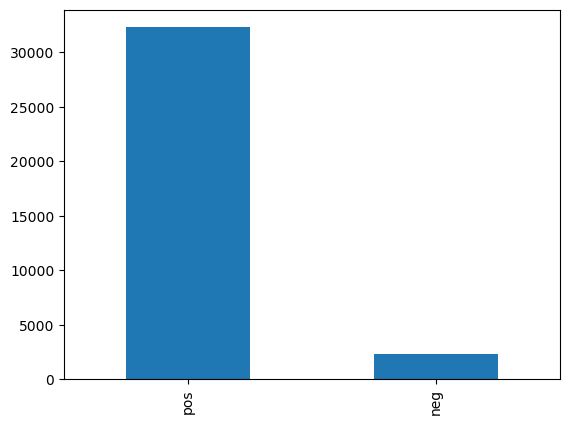

In [6]:
senti["senti"].value_counts().plot.bar()

In [7]:
import nltk.classify.util 
from nltk.classify import NaiveBayesClassifier 
import numpy as np 
import re 
import string 
import nltk

In [8]:
cleanup_re = re.compile('[^a-z]+') 
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    return sentence 

senti["Summary_Clean"] = senti["reviews.text"].apply(cleanup) 
check["Summary_Clean"] = check["reviews.text"].apply(cleanup)

<ipython-input-8-138d43ad6c70>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["Summary_Clean"] = senti["reviews.text"].apply(cleanup)
<ipython-input-8-138d43ad6c70>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["Summary_Clean"] = check["reviews.text"].apply(cleanup)


In [9]:
split = senti[["Summary_Clean" , "senti"]]
split

,Summary_Clean,senti
0,this product so far has not disappointed my ch...,pos
1,great for beginner or experienced person bough...,pos
2,inexpensive tablet for him to use and learn on...,pos
3,i ve had my fire hd two weeks now and i love i...,pos
4,i bought this for my grand daughter when she c...,pos
...,...,...
34655,this is not appreciably faster than any other ...,neg
34656,amazon should include this charger with the ki...,neg
34657,love my kindle fire but i am really disappoint...,neg
34658,i was surprised to find it did not come with a...,neg


In [10]:
train=split.sample(frac=0.8,random_state=200) 
test=split.drop(train.index)
print("Size of Train : \n",train.count(), end="\n\n")
print("Size of Test : \n",test.count())

Size of Train : 
 Summary_Clean    27702
senti            27702
dtype: int64

Size of Test : 
 Summary_Clean    6925
senti            6925
dtype: int64


In [11]:
from wordcloud import STOPWORDS 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
def word_feats(words):
    features = {}
    for word in words:
        features [word] = True
    return features

train["words"] = train["Summary_Clean"].str.lower().str.split() 
test["words"] = test["Summary_Clean"].str.lower().str.split() 
check["words"] = check["Summary_Clean"].str.lower().str.split() 
train.index = range(train.shape[0]) 
test.index = range(test.shape[0]) 
check.index = range(check.shape[0]) 
prediction = {}

<ipython-input-12-5955815db5b5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["words"] = check["Summary_Clean"].str.lower().str.split()


In [13]:
train_naive = [] 
test_naive = [] 
check_naive = [] 
for i in range(train.shape[0]):
    train_naive = train_naive + [[word_feats(train["words"][i]) , train["senti"][i]]] 
    
for i in range(test.shape[0]):
    test_naive = test_naive + [[word_feats(test["words"][i]) , test["senti"][i]]] 
    
for i in range(check.shape[0]):
    check_naive = check_naive + [word_feats(check["words"][i])]

classifier = NaiveBayesClassifier.train(train_naive) 
print("NLTK Naive bayes Accuracy : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))
classifier.show_most_informative_features(5)

NLTK Naive bayes Accuracy : 0.5897472924187726
Most Informative Features
                 deleted = True              neg : pos    =     51.3 : 1.0
                 warning = True              neg : pos    =     51.3 : 1.0
                    bent = True              neg : pos    =     42.0 : 1.0
                    nope = True              neg : pos    =     42.0 : 1.0
                  rotate = True              neg : pos    =     42.0 : 1.0


In [14]:
y =[] 
only_words= [test_naive[i][0] for i in range(test.shape[0])] 
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i] )] 
prediction["Naive"]= np.asarray(y)
prediction["Naive"]

array(['neg', 'neg', 'neg', ..., 'neg', 'neg', 'neg'], dtype='<U3')

In [15]:
y1 = [] 
for i in range(check.shape[0]):
    y1 = y1 + [classifier.classify(check_naive[i])] 
check["Naive"] = y1
check["Naive"]

<ipython-input-15-feacf09f130f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["Naive"] = y1


0     neg
1     neg
2     neg
3     neg
4     neg
5     neg
6     neg
7     neg
8     pos
9     neg
10    neg
11    pos
12    neg
13    neg
14    neg
15    neg
16    pos
17    neg
18    pos
19    neg
20    neg
21    neg
22    neg
23    neg
24    neg
25    neg
26    neg
27    neg
28    neg
29    neg
30    neg
31    neg
32    neg
Name: Naive, dtype: object

In [16]:
from sklearn.naive_bayes import MultinomialNB 
stopwords = list(STOPWORDS)
stopwords.remove("not")
print(stopwords)

["they'll", 'which', 'any', 'herself', 'himself', 'we', 'also', 'where', 'while', 'and', 'were', "who's", "why's", "i'll", 'of', 'our', 'could', 'most', 'on', 'through', "shouldn't", 'out', 'other', 'should', 'the', 'whom', 'how', 'or', 'ours', "she'll", "can't", 'both', 'did', 'get', 'http', 'no', 'k', 'just', 'else', "what's", "when's", "we'd", 'here', "weren't", 'being', 'however', 'hers', "where's", 'below', 'during', 'com', 'his', 'it', 'is', "he's", 'before', 'only', 'in', "they're", 'all', 'what', 'if', "he'd", 'him', 'after', 'at', 'about', 'as', 'your', "wouldn't", 'down', 'been', 'had', 'above', 'an', 'am', 'has', "there's", 'are', 'this', "they'd", 'own', "that's", 'yourselves', 'off', 'he', 'for', 'its', "you've", 'itself', 'once', 'having', 'than', "aren't", "don't", "it's", "she's", 'theirs', 'otherwise', 'shall', "let's", 'so', 'doing', 'over', "she'd", 'that', 'further', 'nor', "we'll", "doesn't", 'with', "we're", "we've", 'would', 'ourselves', 'against', "you'll", "won

In [17]:
count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2)) 
tfidf_transformer = TfidfTransformer() 
X_train_counts = count_vect.fit_transform(train["Summary_Clean"]) 
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts) 
X_new_counts = count_vect.transform(test["Summary_Clean"]) 
X_test_tfidf = tfidf_transformer.transform(X_new_counts) 
checkcounts = count_vect.transform(check["Summary_Clean"]) 
checktfidf = tfidf_transformer.transform(checkcounts)

/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [18]:
model1 = MultinomialNB().fit(X_train_tfidf , train["senti"]) 
prediction['Multinomial'] = model1.predict_proba(X_test_tfidf)[:,1] 
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf , test["senti"]))) 
check["multi"] = model1.predict(checktfidf)

Multinomial Accuracy : 0.9329963898916968


<ipython-input-18-0464e30ba502>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["multi"] = model1.predict(checktfidf)


In [19]:
from sklearn.naive_bayes import BernoulliNB 
model2 = BernoulliNB().fit(X_train_tfidf,train["senti"]) 
prediction['Bernoulli'] = model2.predict_proba(X_test_tfidf)[:,1] 
print("Bernoulli Accuracy : {}".format(model2.score(X_test_tfidf , test["senti"]))) 
check["Bill"] = model2.predict(checktfidf)

Bernoulli Accuracy : 0.9204332129963899


<ipython-input-19-5f9981f949c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["Bill"] = model2.predict(checktfidf)


In [20]:
from sklearn import linear_model 
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000) 
logistic = logreg.fit(X_train_tfidf, train["senti"]) 
prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1] 
print("Logistic Regression Accuracy : {}".format(logreg.score(X_test_tfidf , test["senti"])))
check["log"] = logreg.predict(checktfidf)

/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy : 0.9370397111913358


<ipython-input-20-3f79dc250d3f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["log"] = logreg.predict(checktfidf)


In [23]:
words = count_vect.get_feature_names_out() 
feature_coefs = pd.DataFrame( data = list(zip(words, logistic.coef_[0])), columns = ['feature', 'coef'])
feature_coefs.sort_values(by="coef")
def format(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1 
vfunc = np.vectorize(format) 
test.senti = test.senti.replace(["pos" , "neg"] , [True , False] ) 
def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1])) 
test_sample(logreg, "The product was good and easy to use") 
test_sample(logreg, "the whole experience was horrible and product is worst") 
test_sample(logreg, "product is not good")

Sample estimated as POS: negative prob 0.000000, positive prob 1.000000
Sample estimated as NEG: negative prob 0.995587, positive prob 0.004413
Sample estimated as NEG: negative prob 0.977148, positive prob 0.022852


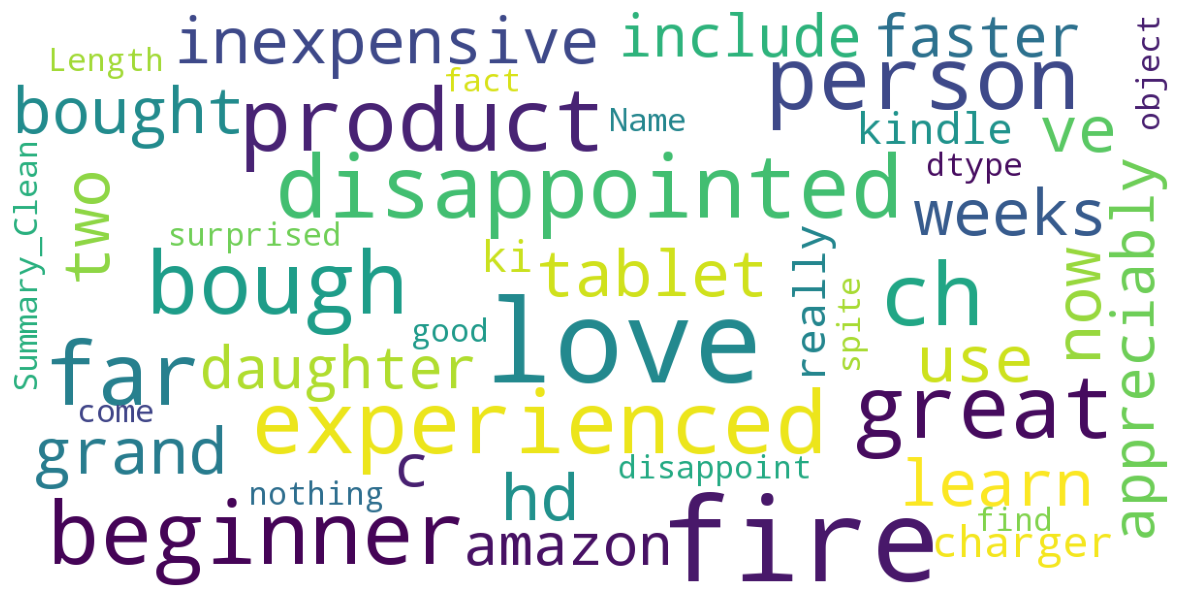

In [24]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
mpl.rcParams['font.size']=12 #10 
mpl.rcParams['savefig.dpi']=100 #72 
mpl.rcParams['figure.subplot.bottom']=.1 
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=40, 
    scale=3,
    random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
 
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(senti["Summary_Clean"])